In [47]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg, integrate

k1,k2,k3,k,m1,m2,m = sp.symbols('k1,k2,k3,k,m_1,m_2,m')
A = sp.matrices.Matrix([[(k1+k2)/m1, -k2/m1],[-k2/m2,(k3+k2)/m2]]) #Ecuación de fuerzas para el sistema
A

Matrix([
[(k1 + k2)/m_1,       -k2/m_1],
[      -k2/m_2, (k2 + k3)/m_2]])

In [21]:
# para el caso mas fácil si k1=k3=k
A_ = A.subs([(k1,k),(k3,k),(m1,m),(m2,m)]) #reemplaza k1 y k3 por k en la matrix A
S_,D_ = A_.diagonalize()
A_

Matrix([
[(k + k2)/m,      -k2/m],
[     -k2/m, (k + k2)/m]])

In [22]:
D_

Matrix([
[k/m,            0],
[  0, (k + 2*k2)/m]])

In [23]:
S_

Matrix([
[1, -1],
[1,  1]])

In [44]:
#Con la matrix de paso S, la cual contiene los autovectores de A en fila
#podemos solucionar el sistema de ecuaciones dado por eta = S*x, para hallar x terminos de eta
x_1, eta_1, x_2, eta_2 = sp.symbols('x_1, eta_1, x_2, eta_2')
eq1 = sp.Eq(S_[0,0]*x_1 + S_[0,1]*x_2,eta_1) #primera ecuación del sistema
eq2 = sp.Eq(S_[1,0]*x_1 + S_[1,1]*x_2,eta_2) #segunda ecuación del sistema
display(eq1,eq2)

Eq(x_1 - x_2, eta_1)

Eq(x_1 + x_2, eta_2)

In [45]:
sol= sp.solve((eq1,eq2),(x_1,x_2))  #solucionamos para x_1, x_2
sol_x1= sp.lambdify((eta_1,eta_2), sol[x_1], 'numpy')
sol_x2= sp.lambdify((eta_1,eta_2),sol[x_2],'numpy')
sol[x_1] # = x_1

eta_1/2 + eta_2/2

In [26]:
sol[x_2]  # = x_2

-eta_1/2 + eta_2/2

In [48]:
# si los valores propios de la matrix A están dados por lambda = omega^2
#entonces la matrix diagonal D_ contiene las soluciones para omega_1^2 y omega_2^2 en su diagonal
#lambdificando podemos obtener la matrix númerica
D_lamb = sp.lambdify((k, k2,m), D_, modules='numpy')

In [49]:
k, k2, m = np.array([0.7, 0.1, 1.0])
#asignando valores númericos a la nueva 'función' matrix, D_lamb, 
# de esta forma podemos obetener a omega1 y omega2 en la diagonal 
omega1_ = np.sqrt(D_lamb(k,k2,m)[0,0])
omega2_ = np.sqrt(D_lamb(k,k2,m)[1,1])
D_lamb(k,k2,m)

array([[0.7, 0. ],
       [0. , 0.9]])

Resolviendo las ecuaciones diferenciales para $\eta$:

Sea $z_1 = \frac{\mathrm{d^2}\eta_1}{\mathrm{d}t^2}$, $z_2 = \frac{\,{\rm d^2}\eta_2}{\,{\rm d}t^2}$ entonces:



$\frac{\mathrm{d}\eta_1}{\mathrm{d}t} = z_1$

$\frac{\mathrm{d}z_1}{\mathrm{d}t} = -\omega_1\eta_1$

$\frac{\mathrm{d}eta_2}{\mathrm{d}t} = z_2$

$\frac{\mathrm{d}v_2}{\mathrm{d}t} = -\omega_2\eta_2$

También se puede escribir como

$U_0=\eta_1$,
$U_1=z_1$,
$U_2=\eta_2$,
$U_3=z_2$

\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}U_0}{\mathrm{d}t}\\
\frac{\mathrm{d}U_1}{\mathrm{d}t}\\
\frac{\mathrm{d}U_2}{\mathrm{d}t}\\
\frac{\mathrm{d}U_3}{\mathrm{d}t}
\end{bmatrix}=
\begin{bmatrix}
U_1\\
-\omega_1U_0\\
U_3\\
-\omega_2U_2\\
\end{bmatrix}
\end{equation}

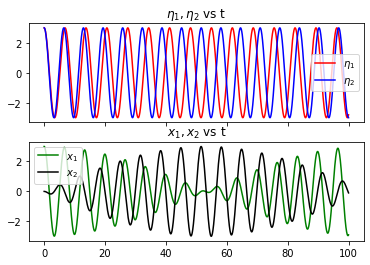

In [53]:

def func_uncoupled(U,t,omega1,omega2):
  dU0dt = U[1]
  dU1dt = -omega1*U[0]
  dU2dt = U[3]
  dU3dt = -omega2*U[2]
  return np.array([dU0dt,dU1dt,dU2dt,dU3dt])

#tiempo
t = np.arange(0,100,0.001)

#condiciones iniciales eta1, z1, eta2, z2 respectivamente
U = np.array([3.0, 0, 3.0, 0])

#resolviendo con odeint
sol_uncoupled = integrate.odeint(func_uncoupled, U, t, args=(omega1_,omega2_)) 
eta1,z1,eta2,z2 = sol_uncoupled.T 

#usamos las soluciones del sistema con el que se encontró x1,x2
x1 = sol_x1(eta1, eta2)
x2 = sol_x2(eta1, eta2)

# gráficas 
fig, axs = plt.subplots(2,1,sharex=True)
#de eta 1, eta2 vs t
axs[0].plot(t,eta1,color='red',label='$\eta_1$')
axs[0].plot(t,eta2,color='blue',label='$\eta_2$')
axs[0].set_title('$\eta_1, \eta_2$ vs t')
axs[0].legend()

#de x1,x2 vs t
axs[1].plot(t,x1,color='green',label='$x_1$')
axs[1].plot(t,x2,color='black',label='$x_2$')
axs[1].set_title('$x_1, x_2$ vs t')
axs[1].legend()

#se puede ver que este es el caso k<k2 , x1(0) = A y x2(0) = 0
#podemos decir que la masa2 (negra) inicia con energia potencial cero y la masa1 (verde) inicia con toda su energia potencial
#entonces la masa1 le va transmitiendo energía potencial a la masa2, pasado un tiempo los roles se invierten
#la masa1 que ahora está en su máximo de energia potencial empieza a pasarle energía potencial a la masa2
#y aspi sucesivamente, puesto que no hay amortiguamiento.

In [ ]:
!pip install vpython

In [ ]:
#animacion

from vpython import *

length = 13.5
scene = canvas(title='two Masses with three Springs System', width=500, height=300, center=vector(0,0,0), background=color.black) 
floor = box(pos=vector(0,-1,0),length=27.0,height= 0.2,width= 2,texture = textures.wood )
left_wall = box(pos=vector(-length,0,0), size= vector(0.2, 2.0, 2.0), texture = textures.wood)
right_wall = box(pos=vector(length,0,0), size= vector(0.2, 2.0, 2.0), texture = textures.wood)
mass1 = box(pos= vector(-4.5,-1/2,0), color= color.blue)
mass2 = box(pos= vector(4.5,-1/2,0), color= color.orange)
spring_right=helix(pos=right_wall.pos,axis = mass2.pos - right_wall.pos, constant=1,coils = 10,thickness=0.1,radius=0.3, color = color.green)
spring_left=helix(pos=left_wall.pos,axis = mass1.pos - left_wall.pos,constant=1,coils = 10,thickness=0.1,radius=0.3, color = color.blue)
spring_mid = helix(pos=mass2.pos,axis = mass1.pos - mass2.pos,constant=1,coils = 10,thickness=0.1,radius=0.3, color = color.red)

t=0
while (True):
  rate(50000)

  sol_uncoupled = integrate.odeint(func_uncoupled, U, t, args=(omega1_,omega2_)) 
  eta1,z1,eta2,z2 = sol_uncoupled.T 
  

  x1 = sol_x1(eta1, eta2)
  x2 = sol_x2(eta1, eta2)
    
  mass1.pos = vector(-4.5 + x1,-1/2,0)
  mass2.pos = vector(4.5 + x2,-1/2,0)

  spring_right.axis = mass2.pos - right_wall.pos
  spring_left.axis = mass1.pos - left_wall.pos
  spring_mid.axis = mass1.pos - mass2.pos
  t+=0.1

In [32]:
#caso general k1,k2,k3,m1,m2
S,D = A.diagonalize()
A

Matrix([
[(k1 + k2)/m_1,       -k2/m_1],
[      -k2/m_2, (k2 + k3)/m_2]])

In [33]:
D #valores de omega1 y omega2 en terminos de k1,k2,k3,m1,m2

Matrix([
[(k1*m_2 + k2*m_1 + k2*m_2 + k3*m_1 - sqrt(k1**2*m_2**2 - 2*k1*k2*m_1*m_2 + 2*k1*k2*m_2**2 - 2*k1*k3*m_1*m_2 + k2**2*m_1**2 + 2*k2**2*m_1*m_2 + k2**2*m_2**2 + 2*k2*k3*m_1**2 - 2*k2*k3*m_1*m_2 + k3**2*m_1**2))/(2*m_1*m_2),                                                                                                                                                                                                                           0],
[                                                                                                                                                                                                                          0, (k1*m_2 + k2*m_1 + k2*m_2 + k3*m_1 + sqrt(k1**2*m_2**2 - 2*k1*k2*m_1*m_2 + 2*k1*k2*m_2**2 - 2*k1*k3*m_1*m_2 + k2**2*m_1**2 + 2*k2**2*m_1*m_2 + k2**2*m_2**2 + 2*k2*k3*m_1**2 - 2*k2*k3*m_1*m_2 + k3**2*m_1**2))/(2*m_1*m_2)]])

In [34]:
S

Matrix([
[2*k2*m_2/(k1*m_2 - k2*m_1 + k2*m_2 - k3*m_1 + sqrt(k1**2*m_2**2 - 2*k1*k2*m_1*m_2 + 2*k1*k2*m_2**2 - 2*k1*k3*m_1*m_2 + k2**2*m_1**2 + 2*k2**2*m_1*m_2 + k2**2*m_2**2 + 2*k2*k3*m_1**2 - 2*k2*k3*m_1*m_2 + k3**2*m_1**2)), 2*k2*m_2/(k1*m_2 - k2*m_1 + k2*m_2 - k3*m_1 - sqrt(k1**2*m_2**2 - 2*k1*k2*m_1*m_2 + 2*k1*k2*m_2**2 - 2*k1*k3*m_1*m_2 + k2**2*m_1**2 + 2*k2**2*m_1*m_2 + k2**2*m_2**2 + 2*k2*k3*m_1**2 - 2*k2*k3*m_1*m_2 + k3**2*m_1**2))],
[                                                                                                                                                                                                                       1,                                                                                                                                                                                                                        1]])

In [37]:
#De igual forma como en el caso más fácil podemos solucionar el sistema de ecuaciones dado por eta = S*x, para hallar x terminos de eta
k1,k2,k3,k,m1,m2,m = sp.symbols('k1,k2,k3,k,m_1,m_2,m')
x_1, eta_1, x_2,eta_2 = sp.symbols('x_1,eta_1,x_2,eta_2')
eq1 = sp.Eq(S[0,0]*x_1 + S[0,1]*x_2,eta_1)#primera ecuación del sistema
eq2 = sp.Eq(S[1,0]*x_1 + S[1,1]*x_2,eta_2) #segunda ecuación del sistema
display(eq1 , eq2)

Eq(2*k2*m_2*x_1/(k1*m_2 - k2*m_1 + k2*m_2 - k3*m_1 + sqrt(k1**2*m_2**2 - 2*k1*k2*m_1*m_2 + 2*k1*k2*m_2**2 - 2*k1*k3*m_1*m_2 + k2**2*m_1**2 + 2*k2**2*m_1*m_2 + k2**2*m_2**2 + 2*k2*k3*m_1**2 - 2*k2*k3*m_1*m_2 + k3**2*m_1**2)) + 2*k2*m_2*x_2/(k1*m_2 - k2*m_1 + k2*m_2 - k3*m_1 - sqrt(k1**2*m_2**2 - 2*k1*k2*m_1*m_2 + 2*k1*k2*m_2**2 - 2*k1*k3*m_1*m_2 + k2**2*m_1**2 + 2*k2**2*m_1*m_2 + k2**2*m_2**2 + 2*k2*k3*m_1**2 - 2*k2*k3*m_1*m_2 + k3**2*m_1**2)), eta_1)

Eq(x_1 + x_2, eta_2)

In [38]:
sol= sp.solve((eq1,eq2),(x_1,x_2)) # soluciones para x_1 y x_2 respectivamente
sol_x1= sp.lambdify((eta_1,eta_2,m1,m2,k1,k2,k3), sol[x_1], 'numpy')
sol_x2= sp.lambdify((eta_1,eta_2,m1,m2,k1,k2,k3),sol[x_2],'numpy')

In [ ]:
#ahora para obtener los valores de omega1 y omega2 númericamente, lambdificar la matrix diagonal de autovalores D
D_lamb = sp.lambdify((k1,k2,k3,m1,m2), D, modules='numpy') 

In [40]:
k1, k2, k3, m1,m2 = np.array([0.2, 0.7, 0.1, 1.0, 1.2]) #asignamos valores númericos a las constantes elasticas y las masas
omega1 = np.sqrt(D_lamb(k1,k2,k3,m1,m2)[0,0]) 
omega2 = np.sqrt(D_lamb(k1,k2,k3,m1,m2)[1,1])

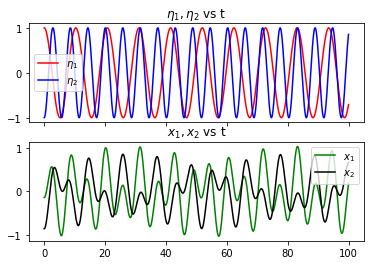

In [41]:
#se realiza el mismo procedimiento para solucionar la ecuación diferencial y hallar eta en terminos de t
def func_uncoupled(U,t,omega1,omega2):
  dU0dt = U[1]
  dU1dt = -omega1*U[0]
  dU2dt = U[3]
  dU3dt = -omega2*U[2]
  return np.array([dU0dt,dU1dt,dU2dt,dU3dt])

#tiempo
t = np.arange(0,100,0.001)

#condiciones iniciales eta1, z1, eta2, z2 respectivamente
U = np.array([1.0,0,-1.0,0])

#resolviendo con odeint
sol_uncoupled = integrate.odeint(func_uncoupled, U, t, args=(omega1,omega2)) 
eta1,z1,eta2,z2 = sol_uncoupled.T 


#usamos las soluciones del sistema con el que se encontró x1,x2
x1 = sol_x1(eta1, eta2,m1,m2,k1,k2,k3) 
x2 = sol_x2(eta1, eta2,m1,m2,k1,k2,k3)
#gráficas
fig, axs = plt.subplots(2,1,sharex=True)
#de eta 1, eta2 vs t
axs[0].plot(t,eta1,color='red',label='$\eta_1$')
axs[0].plot(t,eta2,color='blue',label='$\eta_2$')
axs[0].set_title('$\eta_1, \eta_2$ vs t')
axs[0].legend()

#de x1,x2 vs t
axs[1].plot(t,x1,color='green',label='$x_1$')
axs[1].plot(t,x2,color='black',label='$x_2$')
axs[1].set_title('$x_1, x_2$ vs t')
axs[1].legend()